1. Can we use Bagging for regression problems.

=> Bagging is an ensemble learning technique that can also be applied to regression problem it involves bootstrapping ,training individual models, average pediction

2.What is the difference between multiple model training and single model training

=>In single model we use a single model on a entire dataset. the prediction are made directly by this one model.
whereas in multiple models we train multiple model simultaneously these model can be of same type or different type The predictions from the individual models are then combined in some way (e.g., averaging, voting, weighted averaging, stacking) to produce the final prediction.

3.Explain the concept of feature randomness in Random Forest

=>In Random Forest, at each split in a tree, only a random subset of features is considered. This increases diversity among trees and helps reduce correlation and overfitting.



4.What is OOB (Out-of-Bag) Score.

=>Out-of-Bag score is a way to evaluate the model using samples not included in the bootstrap sample for a particular tree. It acts as a built-in cross-validation for Bagging and Random Forest.



5. How can you measure the importance of features in a Random Forest model.

=>Mean Decrease in Impurity (Gini Importance)

Permutation Importance: Measures drop in model performance when a feature's values are randomly shuffled.

6. 2 Explain the working principle of a Bagging Classifier

=>Creates multiple subsets of training data using bootstrap sampling

Trains a base classifier (like Decision Tree) on each subset

Aggregates predictions using majority voting (for classification)



7.How do you evaluate a Bagging Classifier’s performance.

=>Using metrics like accuracy, precision, recall, F1-score

Can also use OOB score, or standard cross-validation

8. How does a Bagging Regressor work.

=>Trains multiple regressors on bootstrapped samples

Final prediction is the average of individual model predictions

9.  What is the main advantage of ensemble techniques

=>They improve accuracy, robustness, and generalization by combining multiple models, thus reducing overfitting (variance) and underfitting (bias).

10. What is the main challenge of ensemble methods.

=>Increased complexity and computational cost

Less interpretability than individual models

Requires careful tuning to avoid redundancy



11. Explain the key idea behind ensemble techniques.

=>Ensemble learning combines multiple models (weak or strong) to create a more accurate and reliable prediction system than any individual model.



12. What is a Random Forest Classifier.

=>Bagging (bootstrap sampling)

Feature randomness

Combines predictions via majority vote (classification)

13. What are the main types of ensemble techniques.

=>Bagging: Reduces variance

Boosting: Reduces bias

Stacking: Combines different model types with a meta-model



14.  What is ensemble learning in machine learning.

=>A technique that builds a set of models and combines their predictions to improve overall performance, accuracy, and robustness.

15.  When should we avoid using ensemble methods.

=>When interpretability is critical

When training time or computational resources are limited

If a simple model already gives good performance



16. How does Bagging help in reducing overfitting

=>By training on different bootstrap samples, Bagging averages out variance, reducing the chance that a model overfits the training data.

17. Why is Random Forest better than a single Decision Tree

=>Less prone to overfitting

More stable and accurate

Reduces variance by averaging over many trees

18.  What is the role of bootstrap sampling in Bagging

=>Bootstrap sampling ensures diversity by training each model on a different random subset of the training data, enabling variance reduction.



19.  What are some real-world applications of ensemble techniques

=>Finance: Credit scoring, fraud detection

Healthcare: Disease prediction, diagnostics

E-commerce: Recommendation systems

Image recognition, spam detection, customer churn prediction



20. 2 What is the difference between Bagging and Boosting

=> Bagging
Aims to reduce variance and prevent overfitting.

Trains multiple models in parallel using different random subsets (bootstrap samples) of the training data.

Each model is trained independently.

Combines results using majority voting (classification) or averaging (regression).

Works best with high-variance, low-bias models (e.g., decision trees).

Example: Random Forest


Boosting
Aims to reduce bias and improve weak learners.

Models are trained sequentially, where each new model tries to fix the errors made by the previous one.

Gives more weight to misclassified examples.

Combines models through weighted voting or summation.

Often uses shallow trees (weak learners).

Example: AdaBoost, Gradient Boosting, XGBoost

In [ ]:
#21 Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=1
)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy}")

Bagging Classifier Accuracy: 0.8


In [ ]:
#22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_classification(n_samples=1000, n_features=20, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

bagging_clf = BaggingRegressor(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=1
)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
print(f"Bagging regressor mse: {mse}")

Bagging regressor mse: 0.13833333333333334


In [ ]:
#23 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

importance_df=pd.DataFrame({
    'Feature':X.columns,
    'Importance':feature_importances

}).sort_values(by='Importance',ascending=False)

print("Feature Importance Scores:",importance_df)


Feature Importance Scores:                     Feature  Importance
22          worst perimeter    0.141142
27     worst concave points    0.125184
23               worst area    0.115155
20             worst radius    0.089507
7       mean concave points    0.081823
2            mean perimeter    0.073608
6            mean concavity    0.068204
0               mean radius    0.058146
3                 mean area    0.047602
13               area error    0.031727
10             radius error    0.023007
26          worst concavity    0.019958
21            worst texture    0.019246
1              mean texture    0.015433
25        worst compactness    0.014217
28           worst symmetry    0.010095
24         worst smoothness    0.008627
29  worst fractal dimension    0.006844
12          perimeter error    0.006349
17     concave points error    0.005690
5          mean compactness    0.005603
4           mean smoothness    0.005513
19  fractal dimension error    0.004340
18           

In [ ]:
#24 Train a Random Forest Regressor and compare its performance with a single Decision Tree

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)

dt_predictions = dt_regressor.predict(X_test)
rf_predictions = rf_regressor.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f"Decision Tree MSE: {dt_mse}")
print(f"Random Forest MSE: {rf_mse}")




Decision Tree MSE: 0.49077395341813623
Random Forest MSE: 0.26094116173135906


In [ ]:
#25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=1, bootstrap=True)
rf.fit(X_train, y_train)


print(f"Out-of-Bag (OOB) Score: {rf.oob_score_:.4f}")


Out-of-Bag (OOB) Score: 0.9497


In [ ]:
#Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

bagging_clf=BaggingClassifier(
    estimator=SVC(kernel='rbf',probability=True,random_state=1),
    n_estimators=10,
    random_state=1
)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.3f}")


Bagging Classifier Accuracy: 0.901


In [ ]:
#27 Train a Random Forest Classifier with different numbers of trees and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

n_estimators_list = [10, 50, 100, 200]
result=[]

for n in n_estimators_list:
    rf=RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result.append((n, accuracy))

for n, accuracy in result:
    print(f"Number of Estimators: {n}, Accuracy: {accuracy:.3f}")

Number of Estimators: 10, Accuracy: 0.936
Number of Estimators: 50, Accuracy: 0.942
Number of Estimators: 100, Accuracy: 0.947
Number of Estimators: 200, Accuracy: 0.953


In [ ]:
#28 Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_lr = LogisticRegression(solver='liblinear', random_state=2)
bagging_clf = BaggingClassifier(estimator=base_lr,
                                 n_estimators=50,
                                 random_state=2)
bagging_clf.fit(X_train, y_train)
y_probs = bagging_clf.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_probs)

print(f"Bagging Classifier (Logistic Regression base) AUC Score: {auc_score:.4f}")



Bagging Classifier (Logistic Regression base) AUC Score: 0.9981


In [ ]:
#29 Train a Random Forest Regressor and analyze feature importance scores

# Imports
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=2)
rf.fit(X_train, y_train)


importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print results
print(" Feature Importances in Random Forest Regressor:")
print(feature_importance_df)


 Feature Importances in Random Forest Regressor:
      Feature  Importance
0      MedInc    0.525119
5    AveOccup    0.138609
7   Longitude    0.085672
6    Latitude    0.085504
1    HouseAge    0.055015
2    AveRooms    0.048274
4  Population    0.031788
3   AveBedrms    0.030019


In [ ]:
#30.Train an ensemble model using both Bagging and Random Forest and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                  n_estimators=100,
                                  random_state=1)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_preds)


rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print(f" BaggingClassifier Accuracy:      {bagging_acc:.4f}")
print(f" RandomForestClassifier Accuracy: {rf_acc:.4f}")



 BaggingClassifier Accuracy:      0.9532
 RandomForestClassifier Accuracy: 0.9474


In [ ]:
#31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f" Accuracy on Test Set: {acc:.4f}")



Best Hyperparameters:
{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}
 Accuracy on Test Set: 0.9474


In [ ]:
#32.  Train a Bagging Regressor with different numbers of base estimators and compare performance

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


data = fetch_california_housing()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


n_estimators_list = [1, 10, 50, 100, 200]
results = []

for n in n_estimators_list:
    bagging_model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42
    )
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append((n, mse, r2))


print("Performance of BaggingRegressor with Different Estimator Counts:")
for n, mse, r2 in results:
    print(f" - {n} estimators: MSE = {mse:.4f}, R² = {r2:.4f}")


Performance of BaggingRegressor with Different Estimator Counts:
 - 1 estimators: MSE = 0.5583, R² = 0.5746
 - 10 estimators: MSE = 0.2862, R² = 0.7819
 - 50 estimators: MSE = 0.2579, R² = 0.8035
 - 100 estimators: MSE = 0.2568, R² = 0.8043
 - 200 estimators: MSE = 0.2542, R² = 0.8064


In [ ]:
#33.Train a Random Forest Classifier and analyze misclassified samples


In [1]:
#34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {acc_tree:.4f}")

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    bootstrap=True,
    random_state=12
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
print(f"Bagging Classifier Accuracy: {acc_bag:.4f}")

print("\n--- Classification Report: Decision Tree ---")
print(classification_report(y_test, y_pred_tree, target_names=data.target_names))

print("\n--- Classification Report: Bagging Classifier ---")
print(classification_report(y_test, y_pred_bag, target_names=data.target_names))




Decision Tree Accuracy: 0.9667
Bagging Classifier Accuracy: 0.9667

--- Classification Report: Decision Tree ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


--- Classification Report: Bagging Classifier ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



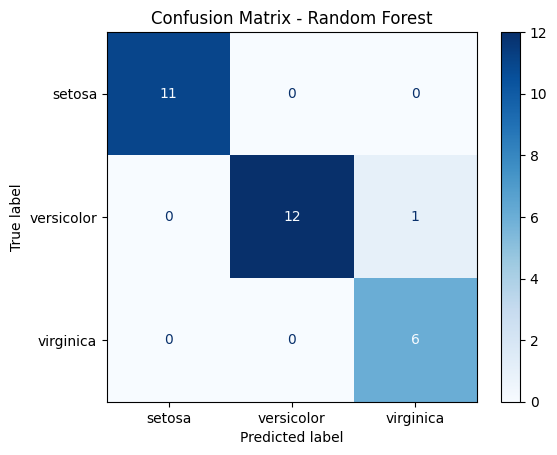

In [2]:
#35. Train a Random Forest Classifier and visualize the confusion matrix

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [6]:
#36.  Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))


Stacking Classifier Accuracy: 1.0


In [11]:
#37.

from sklearn.ensemble import RandomForestClassifier
import numpy as np

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

clf = RandomForestClassifier(random_state=2)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 5 Feature Importances:")
for i in range(len(importances)):
    print(f"Feature {indices[i]}: {importances[indices[i]]:.4f}")


Top 5 Feature Importances:
Feature 3: 0.4500
Feature 2: 0.4385
Feature 0: 0.0793
Feature 1: 0.0322


In [13]:
#38.

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

bag_clf = BaggingClassifier(random_state=2)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



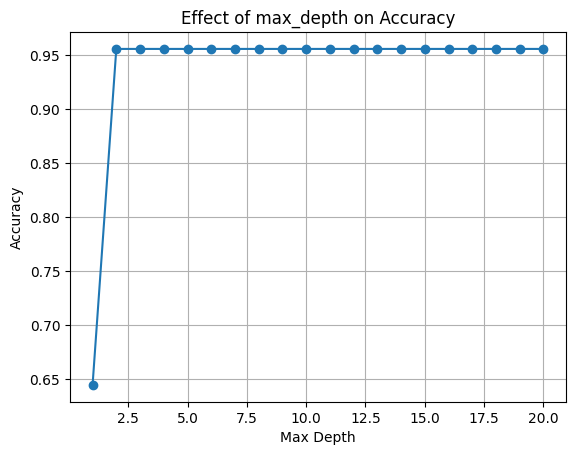

In [15]:
#39
import matplotlib.pyplot as plt

depths = range(1, 21)
accuracies = []

for d in depths:
    model = RandomForestClassifier(max_depth=d, random_state=1)
    model.fit(X_train, y_train)
    accuracies.append(model.score(X_test, y_test))

plt.plot(depths, accuracies, marker='o')
plt.title("Effect of max_depth on Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [17]:
#40.

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

for name, base in [('Decision Tree', DecisionTreeRegressor()), ('KNeighbors', KNeighborsRegressor())]:
    model = BaggingRegressor(estimator=base, random_state=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} MSE: {mean_squared_error(y_test, y_pred):.2f}")


Decision Tree MSE: 3881.16
KNeighbors MSE: 4123.20


In [ ]:
#41.
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = clf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print("ROC-AUC Score (OVR):", roc_auc)


In [19]:
#42.

from sklearn.model_selection import cross_val_score

bag_clf = BaggingClassifier(random_state=42)
cv_scores = cross_val_score(bag_clf, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.         0.02247191 0.         0.         0.        ]
Mean Accuracy: 0.00449438202247191


In [ ]:
#43
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = clf.predict_proba(X_test)

for i in range(y_bin.shape[1]):
    precision, recall  = precision_recall_curve(y_bin[:, i], y_score[:, i])
    avg_prec = average_precision_score(y_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, label=f"Class {i} (AP={avg_prec:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
#44.
stack_model = StackingClassifier(
    estimators=[('rf', RandomForestClassifier(random_state=42))],
    final_estimator=LogisticRegression()
)
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
print("Stacking (RF + LR) Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (167) does not match total number of classes (186). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in training fold (166) does not match total number of classes (186). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1380: RuntimeWarning: Number of classes in trainin

Stacking (RF + LR) Accuracy: 0.0


In [21]:
#45.
sample_sizes = [0.5, 0.7, 1.0]
for size in sample_sizes:
    reg = BaggingRegressor(max_samples=size, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Bootstrap Sample Size {size}: MSE = {mse:.2f}")



Bootstrap Sample Size 0.5: MSE = 3923.12
Bootstrap Sample Size 0.7: MSE = 3774.78
Bootstrap Sample Size 1.0: MSE = 3881.16
